In [20]:
import numpy as np
import pandas as pd
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
def random_coordinates(size=2000):
    """Create a set of random latitude and longitude combinations."""
    lats = np.random.uniform(low=-90.000, high=90.000, size=size)
    lats = 180*np.arcsin(lats/90) / np.pi # equal surface parameterization
    lngs = np.random.uniform(low=-180.000, high=180.000, size=size)
    return  zip(lats, lngs)

In [4]:
lat_lngs = random_coordinates()
cities = []
for lat, lng in lat_lngs:
    city = citipy.nearest_city(lat, lng)
    cities.append(city.city_name)

In [5]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    print(f"Processing Record {str(record_count).rjust(2, ' ')} of "
          f"Set {str(set_count).rjust(2, ' ')} | {city}")
    record_count += 1

    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        city_date = (datetime.utcfromtimestamp(city_weather["dt"])
                     .strftime('%Y-%m-%d %H:%M:%S'))

        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
    
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record  1 of Set  1 | teguise
Processing Record  2 of Set  1 | mutsu
Processing Record  3 of Set  1 | rikitea
Processing Record  4 of Set  1 | kapaa
Processing Record  5 of Set  1 | gambiran
Processing Record  6 of Set  1 | louisbourg
City not found. Skipping...
Processing Record  7 of Set  1 | marcona
City not found. Skipping...
Processing Record  8 of Set  1 | new norfolk
Processing Record  9 of Set  1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set  1 | bodden town
Processing Record 11 of Set  1 | upernavik
Processing Record 12 of Set  1 | asau
Processing Record 13 of Set  1 | umzimvubu
City not found. Skipping...
Processing Record 14 of Set  1 | saurimo
Processing Record 15 of Set  1 | ulladulla
Processing Record 16 of Set  1 | forbes
Processing Record 17 of Set  1 | elias
Processing Record 18 of Set  1 | puerto ayora
Processing Record 19 of Set  1 | westport
Processing Record 20 of Set  1 

Processing Record 31 of Set  4 | fukue
Processing Record 32 of Set  4 | taoudenni
Processing Record 33 of Set  4 | torbay
Processing Record 34 of Set  4 | taolanaro
City not found. Skipping...
Processing Record 35 of Set  4 | kaitangata
Processing Record 36 of Set  4 | samalaeulu
City not found. Skipping...
Processing Record 37 of Set  4 | mataura
Processing Record 38 of Set  4 | carnarvon
Processing Record 39 of Set  4 | jiangyou
Processing Record 40 of Set  4 | bethel
Processing Record 41 of Set  4 | ikot ekpene
Processing Record 42 of Set  4 | mao
Processing Record 43 of Set  4 | hithadhoo
Processing Record 44 of Set  4 | souillac
Processing Record 45 of Set  4 | praia da vitoria
Processing Record 46 of Set  4 | ancud
Processing Record 47 of Set  4 | barrow
Processing Record 48 of Set  4 | rikitea
Processing Record 49 of Set  4 | jamestown
Processing Record 50 of Set  4 | pyu
Processing Record  1 of Set  5 | victoria
Processing Record  2 of Set  5 | mataura
Processing Record  3 of S

Processing Record 15 of Set  8 | chorozinho
Processing Record 16 of Set  8 | carnarvon
Processing Record 17 of Set  8 | ewa beach
Processing Record 18 of Set  8 | atuona
Processing Record 19 of Set  8 | hilo
Processing Record 20 of Set  8 | hermanus
Processing Record 21 of Set  8 | bougouni
Processing Record 22 of Set  8 | kutum
Processing Record 23 of Set  8 | butaritari
Processing Record 24 of Set  8 | misratah
Processing Record 25 of Set  8 | ballina
Processing Record 26 of Set  8 | anisoc
Processing Record 27 of Set  8 | kapaa
Processing Record 28 of Set  8 | albany
Processing Record 29 of Set  8 | rikitea
Processing Record 30 of Set  8 | banjar
Processing Record 31 of Set  8 | gossas
Processing Record 32 of Set  8 | severo-kurilsk
Processing Record 33 of Set  8 | castro
Processing Record 34 of Set  8 | hasaki
Processing Record 35 of Set  8 | pafos
Processing Record 36 of Set  8 | airai
Processing Record 37 of Set  8 | dikson
Processing Record 38 of Set  8 | flinders
Processing Rec

Processing Record  3 of Set 12 | cape town
Processing Record  4 of Set 12 | antigonish
Processing Record  5 of Set 12 | noumea
Processing Record  6 of Set 12 | taolanaro
City not found. Skipping...
Processing Record  7 of Set 12 | victoria
Processing Record  8 of Set 12 | puerto ayora
Processing Record  9 of Set 12 | lebu
Processing Record 10 of Set 12 | presidente epitacio
Processing Record 11 of Set 12 | abu dhabi
Processing Record 12 of Set 12 | lata
Processing Record 13 of Set 12 | vila franca do campo
Processing Record 14 of Set 12 | ormara
Processing Record 15 of Set 12 | mar del plata
Processing Record 16 of Set 12 | brigantine
Processing Record 17 of Set 12 | coahuayana
Processing Record 18 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 12 | hilo
Processing Record 20 of Set 12 | chagda
City not found. Skipping...
Processing Record 21 of Set 12 | melipilla
Processing Record 22 of Set 12 | avarua
Processing Record 23 of Set 12 | bengkulu
Processing R

Processing Record 40 of Set 15 | acapulco
Processing Record 41 of Set 15 | mount gambier
Processing Record 42 of Set 15 | wajid
Processing Record 43 of Set 15 | port elizabeth
Processing Record 44 of Set 15 | puerto ayora
Processing Record 45 of Set 15 | kirakira
Processing Record 46 of Set 15 | nikolskoye
Processing Record 47 of Set 15 | sawakin
Processing Record 48 of Set 15 | vaini
Processing Record 49 of Set 15 | esperance
Processing Record 50 of Set 15 | vaitupu
City not found. Skipping...
Processing Record  1 of Set 16 | la asuncion
Processing Record  2 of Set 16 | naze
Processing Record  3 of Set 16 | thompson
Processing Record  4 of Set 16 | ushuaia
Processing Record  5 of Set 16 | ust-kalmanka
Processing Record  6 of Set 16 | bethel
Processing Record  7 of Set 16 | adrar
Processing Record  8 of Set 16 | ciro marina
Processing Record  9 of Set 16 | castro
Processing Record 10 of Set 16 | ushuaia
Processing Record 11 of Set 16 | ushuaia
Processing Record 12 of Set 16 | puerto ay

Processing Record 24 of Set 19 | kahului
Processing Record 25 of Set 19 | punta arenas
Processing Record 26 of Set 19 | clyde river
Processing Record 27 of Set 19 | dunedin
Processing Record 28 of Set 19 | namatanai
Processing Record 29 of Set 19 | hilo
Processing Record 30 of Set 19 | bengkulu
Processing Record 31 of Set 19 | bandiagara
Processing Record 32 of Set 19 | meulaboh
Processing Record 33 of Set 19 | taltal
Processing Record 34 of Set 19 | huambo
Processing Record 35 of Set 19 | vao
Processing Record 36 of Set 19 | codrington
Processing Record 37 of Set 19 | bukan
Processing Record 38 of Set 19 | la orilla
Processing Record 39 of Set 19 | carnarvon
Processing Record 40 of Set 19 | port alfred
Processing Record 41 of Set 19 | rio grande
Processing Record 42 of Set 19 | mataura
Processing Record 43 of Set 19 | ribeira grande
Processing Record 44 of Set 19 | hermanus
Processing Record 45 of Set 19 | avarua
Processing Record 46 of Set 19 | rikitea
Processing Record 47 of Set 19 

Processing Record 14 of Set 23 | jining
Processing Record 15 of Set 23 | marrakesh
Processing Record 16 of Set 23 | weiser
Processing Record 17 of Set 23 | kysyl-syr
Processing Record 18 of Set 23 | doha
Processing Record 19 of Set 23 | luanda
Processing Record 20 of Set 23 | warqla
City not found. Skipping...
Processing Record 21 of Set 23 | yakeshi
Processing Record 22 of Set 23 | sierpc
Processing Record 23 of Set 23 | butaritari
Processing Record 24 of Set 23 | gamba
Processing Record 25 of Set 23 | kaeo
Processing Record 26 of Set 23 | reconquista
Processing Record 27 of Set 23 | amderma
City not found. Skipping...
Processing Record 28 of Set 23 | new norfolk
Processing Record 29 of Set 23 | kalmunai
Processing Record 30 of Set 23 | santa marta
Processing Record 31 of Set 23 | samalaeulu
City not found. Skipping...
Processing Record 32 of Set 23 | nanortalik
Processing Record 33 of Set 23 | port elizabeth
Processing Record 34 of Set 23 | hasaki
Processing Record 35 of Set 23 | mat

Processing Record 46 of Set 26 | port keats
Processing Record 47 of Set 26 | westport
Processing Record 48 of Set 26 | rochegda
Processing Record 49 of Set 26 | trincomalee
Processing Record 50 of Set 26 | pecos
Processing Record  1 of Set 27 | mackay
Processing Record  2 of Set 27 | kapaa
Processing Record  3 of Set 27 | ahuimanu
Processing Record  4 of Set 27 | rikitea
Processing Record  5 of Set 27 | butaritari
Processing Record  6 of Set 27 | jacareacanga
Processing Record  7 of Set 27 | sentyabrskiy
City not found. Skipping...
Processing Record  8 of Set 27 | kodiak
Processing Record  9 of Set 27 | totness
Processing Record 10 of Set 27 | umm lajj
Processing Record 11 of Set 27 | bandarbeyla
Processing Record 12 of Set 27 | maketu
Processing Record 13 of Set 27 | naze
Processing Record 14 of Set 27 | puerto ayora
Processing Record 15 of Set 27 | cidreira
Processing Record 16 of Set 27 | cururupu
Processing Record 17 of Set 27 | rikitea
Processing Record 18 of Set 27 | bredasdorp
P

Processing Record 33 of Set 30 | andros town
Processing Record 34 of Set 30 | mataura
Processing Record 35 of Set 30 | rikitea
Processing Record 36 of Set 30 | lebu
Processing Record 37 of Set 30 | guanica
Processing Record 38 of Set 30 | mataura
Processing Record 39 of Set 30 | cape town
Processing Record 40 of Set 30 | butaritari
Processing Record 41 of Set 30 | mergui
City not found. Skipping...
Processing Record 42 of Set 30 | hirara
Processing Record 43 of Set 30 | fortuna
Processing Record 44 of Set 30 | meulaboh
Processing Record 45 of Set 30 | ribeira grande
Processing Record 46 of Set 30 | whitianga
Processing Record 47 of Set 30 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 30 | missoula
Processing Record 49 of Set 30 | svetlaya
Processing Record 50 of Set 30 | maniitsoq
Processing Record  1 of Set 31 | arraial do cabo
Processing Record  2 of Set 31 | rikitea
Processing Record  3 of Set 31 | rikitea
Processing Record  4 of Set 31 | korla
Processing Rec

Processing Record 24 of Set 34 | bambous virieux
Processing Record 25 of Set 34 | bandarbeyla
Processing Record 26 of Set 34 | puerto ayora
Processing Record 27 of Set 34 | vicuna
Processing Record 28 of Set 34 | saskylakh
Processing Record 29 of Set 34 | mataura
Processing Record 30 of Set 34 | albany
Processing Record 31 of Set 34 | rikitea
Processing Record 32 of Set 34 | srednekolymsk
Processing Record 33 of Set 34 | punta arenas
Processing Record 34 of Set 34 | nikolskoye
Processing Record 35 of Set 34 | kapaa
Processing Record 36 of Set 34 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 34 | taolanaro
City not found. Skipping...
Processing Record 38 of Set 34 | rikitea
Processing Record 39 of Set 34 | victoria
Processing Record 40 of Set 34 | gallup
Processing Record 41 of Set 34 | rumoi
Processing Record 42 of Set 34 | codajas
Processing Record 43 of Set 34 | bressanone
Processing Record 44 of Set 34 | provideniya
Processing Record 45 of Set 34 | catamarca

Processing Record  8 of Set 38 | albany
Processing Record  9 of Set 38 | avarua
Processing Record 10 of Set 38 | pacific grove
Processing Record 11 of Set 38 | vila velha
Processing Record 12 of Set 38 | puerto ayora
Processing Record 13 of Set 38 | kodiak
Processing Record 14 of Set 38 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 38 | muzhi
Processing Record 16 of Set 38 | port-gentil
Processing Record 17 of Set 38 | busselton
Processing Record 18 of Set 38 | panzhihua
Processing Record 19 of Set 38 | faanui
Processing Record 20 of Set 38 | tigre
Processing Record 21 of Set 38 | hobyo
Processing Record 22 of Set 38 | kapaa
Processing Record 23 of Set 38 | mount isa
Processing Record 24 of Set 38 | nantucket
Processing Record 25 of Set 38 | rikitea
Processing Record 26 of Set 38 | pinotepa nacional
Processing Record 27 of Set 38 | busselton
Processing Record 28 of Set 38 | saldanha
Processing Record 29 of Set 38 | jamestown
Processing Record 30 of Set 38 | cara

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Teguise,29.0605,-13.5640,73.62,73,20,19.57,ES,2021-09-27 17:53:48
1,Mutsu,41.2894,141.2169,57.99,81,91,8.52,JP,2021-09-27 17:53:48
2,Rikitea,-23.1203,-134.9692,73.09,73,15,21.50,PF,2021-09-27 17:53:49
3,Kapaa,22.0752,-159.3190,77.32,78,20,13.80,US,2021-09-27 17:53:49
4,Gambiran,-6.7988,111.4951,76.55,74,55,5.46,ID,2021-09-27 17:53:49
5,New Norfolk,-42.7826,147.0587,45.91,69,74,1.01,AU,2021-09-27 17:53:50
6,Bodden Town,19.2833,-81.2500,89.60,66,20,12.73,KY,2021-09-27 17:53:50
7,Upernavik,72.7868,-56.1549,26.62,56,29,2.48,GL,2021-09-27 17:53:50
8,Asau,46.4333,26.4000,60.28,76,85,1.97,RO,2021-09-27 17:53:51
9,Saurimo,-9.6608,20.3916,71.46,66,100,2.98,AO,2021-09-27 17:53:51


In [9]:
output_data_file = "Weather_Database/WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

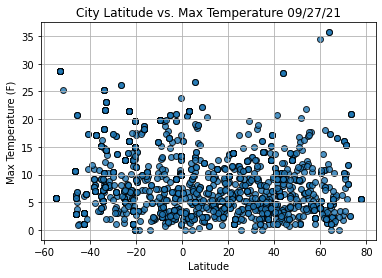

In [19]:
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()